# Regression Continued: Variable Transformation, Multiple Regression

---

#### Let's recap regression:

A linear regression is _an explanation of a continuous variable given a series of independent variables._ In it's simplest form, a linear regression reminds us of a basic algebraic function - a line of best fit:

`y = mx + b`

That is: given some value __x__, its power in explanation __m__, and a starting point __b__, explain the value __y__.

However, the power of a linear regression is that we can use linear algebra to explain _multiple_ x's together in order to explain y:

`y = betas * X + alpha (+ error)`

Our terminology is now:

Given a matrix __X__, their relative coefficients __beta__, and a y-intercept __alpha__, explain a dependent vector, __y__.

A linear regression works best when:

* The data is normally distributed (but doesn't have to be)
* The Xs significantly explain y (have low p-values)
* The Xs are independent of each other (low multicollinearity)
* The resulting values passes linear assumptions (dependent on problem)

**Check:** What is linear regression and when can it be applied?


<a name="demo1"></a>
## Demo: Regressing and normal distributions 

When working with linear regressions, it helps to have data with normal distributions. Linear regressions have linear solutions, and we want this linear solution to explain the majority, "normal" part of our data; not the outliers! If the data is not normally distributed, the model could introduce _bias_, a term we will be discussing in more detail later on in the course.

For example, let's look at explaining the relationship between an animal's body weight, and their brain weight.

---

**Motivating queston:** What do we do if we have non-normal data or colinearity in our model?

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
import statsmodels.iolib.summary
from statsmodels.stats.descriptivestats import Describe


# read in the mammal dataset
wd = '../datasets/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", r'LAPACK')

# Part I:

Let's look at an example with more complex relationships between variables

In [ ]:
mammals.head()

### Check 1. Distribution

First, Lets check out a scatter plot of body weight and brain weight

In [28]:
mammals[['bodywt', 'brainwt']].skew()

bodywt     6.262996
brainwt    4.886142
dtype: float64

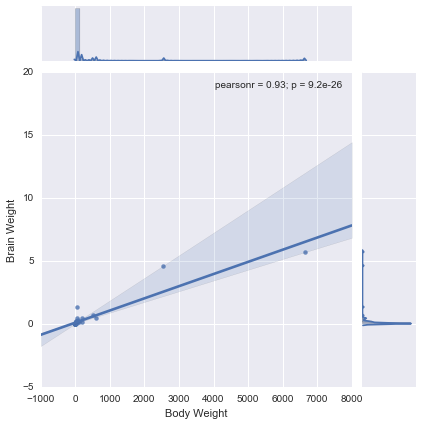

In [15]:
# https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.regplot.html#seaborn.regplot

# New plotting tool: jointplot
plt.figure(figsize=(20, 14))
g = sns.jointplot('bodywt', 'brainwt', mammals, kind='reg')


g.set_axis_labels( "Body Weight", "Brain Weight");

### Log transformation can help here. 

It's hard to see what's going on here because our samples are skewed.

*More on the math http://onlinestatbook.com/2/transformations/log.html*

In [27]:
log_columns = ['bodywt', 'brainwt',]
log_mammals = mammals.copy()
log_mammals[log_columns] = log_mammals[log_columns].apply(np.log10)

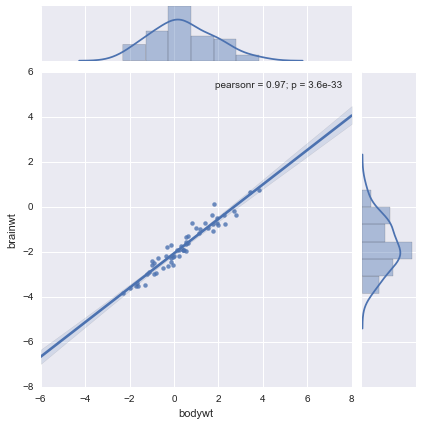

In [16]:
sns.jointplot(data=log_mammals[log_columns], x='bodywt', y='brainwt', kind='reg')

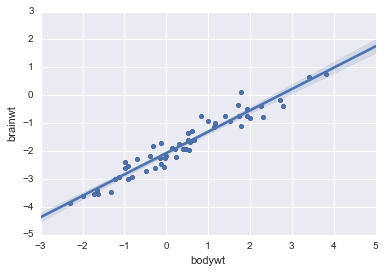

In [25]:
# Check the skewness:
pd.DataFrame({
    'log_mammals': log_mammals[log_columns].skew(),
    'mammals': mammals[log_columns].skew()
    })

# Pandas version:
log_mammals[log_columns].plot(kind='scatter', x='bodywt', y='brainwt')

# 
sns.regplot(x='bodywt', y='brainwt', data=log_mammals[log_columns])

In [29]:
# Create a jointplot of the log transformed data
mammals.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
9,Roe deer,Capreolus,herbi,Artiodactyla,lc,3.0,NaN,NaN,21.0,0.09820,14.800


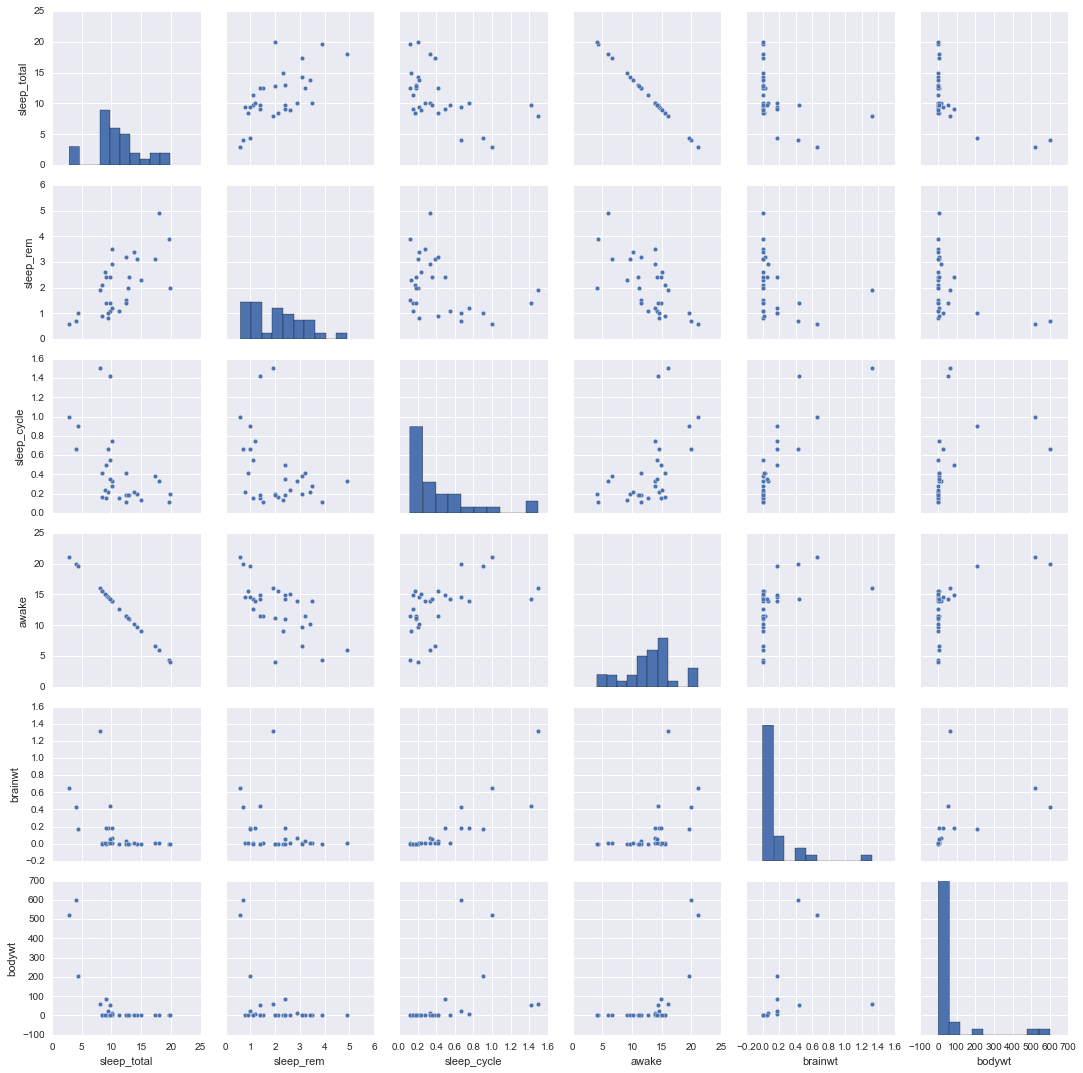

In [38]:
mammals.dtypes

mammals_numeric = mammals.select_dtypes(include=[np.float])

sns.pairplot(mammals_numeric.dropna())

# TODO: Create a pairplot for log transformed dataframe

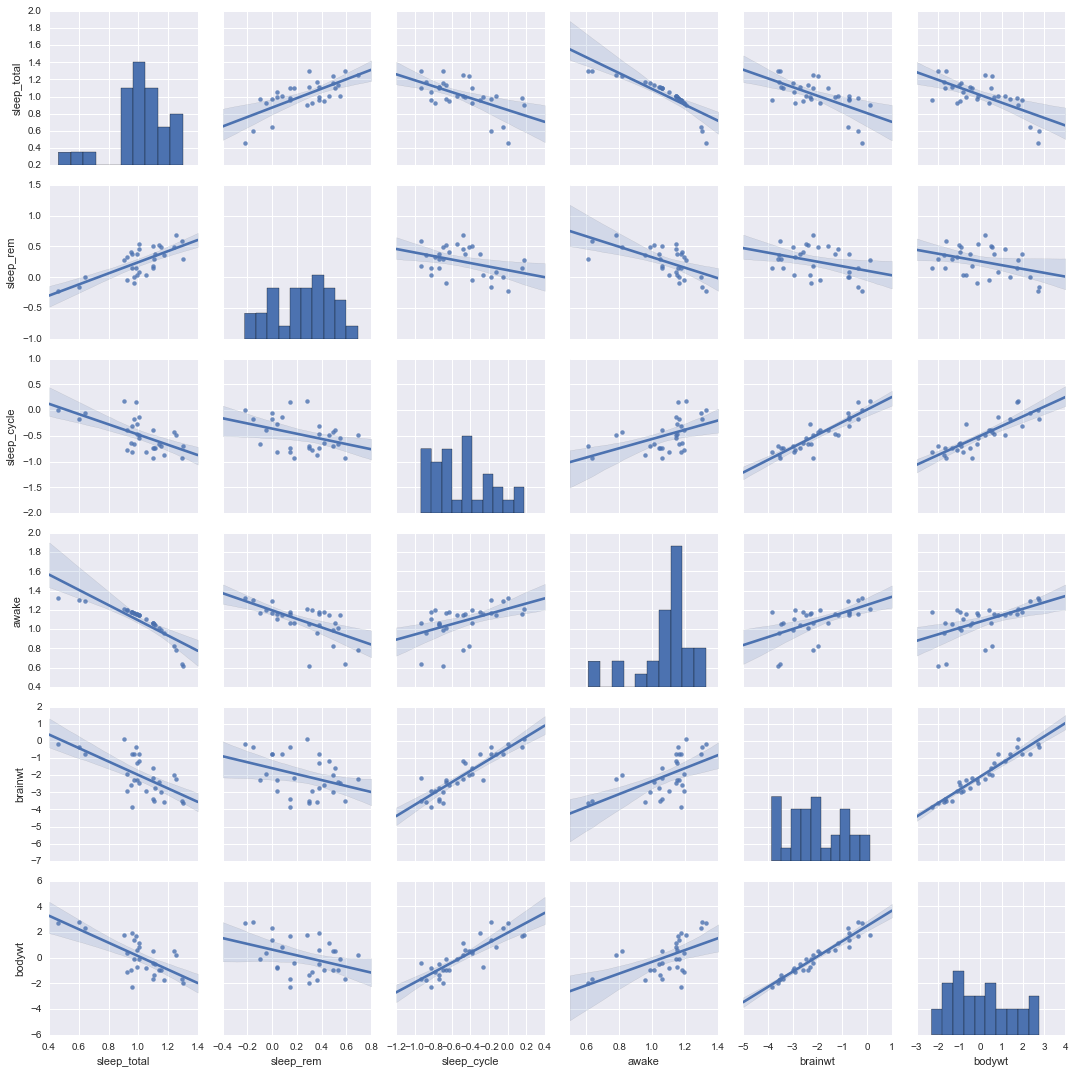

In [45]:
# TODO: 

sns.pairplot(mammals.select_dtypes(include=[np.number]).apply(np.log10).dropna(), kind='reg')

#### This looks much better!

## Part 1 Review -  Student: 
Update and complete the code below to use regplot and display correlations between body weight and two dependent variables: `sleep_rem` and `awake`.


##### Complete below for 2 new models: 
With body weight as the x and y set as:
1. sleep_rem 
2. awake

#### Create the jointplots

In [ ]:
# New plotting tool: jointplot

#### What if we have many columns? How might we explore variable relationships?

In [ ]:
# Select numeric columns:
mammals_numeric_features = mammals.select_dtypes(include=[np.number]).dropna()

In [ ]:
# Pairplot!: https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot
g = sns.pairplot(mammals_numeric_features)

# Tip: Pairplot is *very* powerful, but can be slow for large datasets. Consider using df.sample(n) to 
#  randomly sample a smaller subset of your data in such cases.

In [ ]:
# TODO: Create a scatter plot of log-scaled features

In [ ]:
# How to choose? -> We want a skewness near zero!

pd.DataFrame({
        'original': mammals_numeric_features.skew(),
        'log-transformed': mammals_numeric_features.apply(np.log10).skew()
    })

##### We decided above that we will need a log transformation. Let's take a look at both models to compare

In [50]:
# original dataset (not transformed)

X = mammals[['bodywt']] # Our predictors/features
y = mammals['brainwt']  # Our target

# 1. create a fitted model in one line
# formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
# with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
model = smf.ols(formula='y ~ X', data=mammals)

lm_formula = model.fit()

lm_OLS = smf.OLS(y, X, data=mammals).fit()

# 2. print the full summary
lm_formula.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     367.7
Date:                Mon, 20 Jun 2016   Prob (F-statistic):           9.16e-26
Time:                        20:19:50   Log-Likelihood:                -20.070
No. Observations:                  56   AIC:                             44.14
Df Residuals:                      54   BIC:                             48.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0859      0.048      1.782      0.080        -0.011     0.183
X              0.0010   5.03e-05     19.176      0.000         0.001     0.001
==============================================================================
Omnibus:                       85.068   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1330.630
Skew:                           4.258   Prob(JB):                    1.14e-289
Kurtosis:                      25.311   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our output tells us that:

* The relationship between bodywt and brainwt isn't random (p value approaching 0)  
* With this current model, brainwt is roughly bodywt * 0.0010
* The model explains, roughly, 87% of the variance of the dataset 

In [ ]:
# Whats the predicted brain size for a body weight of 500kg?

lm.predict({"X": 500})

### Student: repeat with the log transformation

In [ ]:
# 1. create a fitted model in one line
#  formula notiation is the equivalent to writting out our models such that 'outcome = predictor'
#  with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'

# 2. print the full summary

### What does our output tell us?

Our output tells us that:


### Bonus: predict the brain weight for a body weight of 500 using the log-transformed model

In [ ]:
# Answer

---

# Part II: Multiple Regression Analysis using citi bike data 

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

For example, a house's price may be best measured by **`square feet`**, but a lot of other variables play a vital role: **`bedrooms`**, **`bathrooms`**, **`location`**, **`appliances`**, etc. 

For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bikeshare data to showcase what this means and to explain a concept called *multicollinearity*.

In [52]:
bike_data = pd.read_csv('../datasets/bikeshare.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Check 2. Multicollinearity
What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership. 

Our data is already normalized between 0 and 1, so we'll start off with the correlations and modeling.

## Students: 
using the code from the demo create a correlation heat map comparing 'temp', 'atemp', 'casual'

In [57]:
# TODO

bike_data[['temp', 'atemp', 'casual']].corr()

,temp,atemp,casual
temp,1.000000,0.987672,0.459616
atemp,0.987672,1.000000,0.454080
casual,0.459616,0.454080,1.000000


#### Question: What did we find? 

#### The correlation matrix explains that:


*We can measure this effect in the coefficients*

## Intro to scikit learn

In [51]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y):
    
    # *TODO* 1: Describe in your words
    model = linear_model.LinearRegression()   # Specify the model
    pvals = feature_selection.f_regression(X, y)[1]  # Defining the model
    # get the pvalue of X given y. Ignore f-stat for now.
    
    # *TODO*: Describe in your words
    
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    model.fit(X, y)

    residuals = (y - model.predict(X)).values

    # print the necessary values
    # *TODO*: Describe in your words
    print 'P Values:', pvals
    print 'Coefficients:', model.coef_
    print 'y-intercept:', model.intercept_
    print 'R-Squared:', model.score(X,y)
    print
    
    # keep the model
    return model

In [64]:
# Target variable (outcome)
y = bike_data['casual']

# Possible features
x_sets = (
    ['temp'],
    ['atemp'],
    ['temp', 'atemp'],
)

for x in x_sets:
    print ', '.join(x)
    get_linear_model_metrics(bike_data[x], y)
    print

temp
P Values: [ 0.]
Coefficients: [ 117.68705779]
y-intercept: -22.812739188
R-Squared: 0.21124654163


atemp
P Values: [ 0.]
Coefficients: [ 130.27875081]
y-intercept: -26.3071675481
R-Squared: 0.206188705733


temp, atemp
P Values: [ 0.  0.]
Coefficients: [ 116.34021588    1.52795677]
y-intercept: -22.8703398286
R-Squared: 0.21124723661




### Question: Has our model improved when using both temp, atemp?

###  Intrepretation: 


### What happens if we use a second variable that isn't highly correlated with temperature, like humidity?



In [62]:
bike_data[['temp', 'hum']].corr()

,temp,hum
temp,1.000000,-0.069881
hum,-0.069881,1.000000


In [63]:
y = bike_data['casual']
x = bike_data[['temp', 'hum']]

get_linear_model_metrics(x, y)

P Values: [ 0.  0.]
Coefficients: [ 112.02457031  -80.87301833]
y-intercept: 30.7273338581
R-Squared: 0.310901196913



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Guided Practice: Multicollinearity with dummy variables (15 mins)



There can be a similar effect from a feature set that is a singular matrix, which is when there is a clear relationship in the matrix (for example, the sum of all rows = 1).

### Run through the following code on your own.
#### What happens to the coefficients when you include all weather situations instead of just including all except one?

In [ ]:
lm = linear_model.LinearRegression()
weather = pd.get_dummies(bike_data.weathersit)

get_linear_model_metrics(weather[[1, 2, 3, 4]], y)

# Set one weather as the reference (drop it), weather situation  = 4
get_linear_model_metrics(weather[[1, 2, 3]], y)

### Similar in Statsmodels

In [ ]:
# all dummies in the model
lm_stats = smf.ols(formula='y ~ weather[[1, 2, 3, 4]]', data=bike_data).fit()
lm_stats.summary()

### Students: Now drop one

In [ ]:
# dropping one

### Interpretation: 
This model makes more sense, because we can more easily explain the variables compared to the one we left out. 

For example, this suggests that a clear day (weathersit:1) on average brings in about 38 more riders hourly than a day with heavy snow. 

In fact, since the weather situations "degrade" in quality (1 is the nicest day, 4 is the worst), the coefficients now reflect that well. 

However at this point, there is still a lot of work to do, because weather on its own fails to explain ridership well.




### Checkout our data again

In [ ]:
bike_data.dtypes

In [ ]:
bike_data.describe()

# Part 3- Building a model to predict guest ridership
With a partner, complete this code together and visualize the correlations of all the numerical features built into the data set.

We want to:
- Id categorical variables
- Create dummies (weather situation is done for you in the starter code)
- Find at least two more features that are not correlated with current features, but could be strong indicators for predicting guest riders.

In [ ]:
# Hint: use sns.heatmap or sns.pairplot(df) to explore your variable relationships!

In [ ]:
# Sample starter code (hints!)

#Dummies example: 
weather = pd.get_dummies(bike_data.weathersit)

#create new names for our new dummy variables
weather.columns = ['weather_' + str(i) for i in weather.columns]

#join those new variables back into the larger dataset
bikemodel_data = bike_data.join(weather)
print bikemodel_data.columns

#Select columns to keep. Don't forget to set a reference category for your dummies (aka drop one)
columns_to_keep = ['temp', 'weather_1', 'weather_2', 'weather_3'] #[which_variables?]

#checking for colinearity
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikemodel_data[columns_to_keep].corr()# what are we getting the correlations of?

print correlations
print sns.heatmap(correlations, cmap=cmap)

## Independent Practice: Building model to predict guest ridership 


#### Pay attention to:
* Which variables would make sense to dummy (because they are categorical, not continuous)? 
* the distribution of riders (should we rescale the data?)  
* checking correlations with variables and guest riders  
* having a feature space (our matrix) with low multicollinearity  
* the linear assumption -- given all feature values being 0, should we have no ridership? negative ridership? positive ridership?
* What features might explain ridership but aren't included in the data set? 

### You're done when:  
If your model has an r-squared above .4, this a relatively effective model for the data available. Kudos! Move on to the bonus!

In [ ]:
# your code here...

In [ ]:
# and here

In [ ]:
# add as many cells as you need :) 

#### 1: What's the strongest predictor? 

Answer:

#### 2: How well did your model do? 

Answer:

#### 3: How can you improve it? 

Answer:

### Bonus:
    
We've completed a model that explains casual guest riders. Now it's your turn to build another model, using a different y (outcome) variable: registered riders.

**Bonus 1:** What's the strongest predictor? 

**Bonus 2:** How well did your model do? 

**Bonus 3:** How can you improve it? 

### Additional Resources:

- Good explanation of when to apply log scaling: http://stats.stackexchange.com/a/28007